In [1]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir())
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split





['.config', 'sample_data']


In [3]:
#@title Default title text
#importing dataset

dataset = pd.read_csv("/content/heart1.csv")

type(dataset)



pandas.core.frame.DataFrame

# New Section

In [4]:
#shape

dataset.shape



(1025, 14)

In [5]:
#printing first 5 columns

dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
#printing any 5 columns

dataset.sample(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
335,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
783,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
198,60,0,2,102,318,0,1,160,0,0.0,2,1,2,1
892,54,1,0,110,239,0,1,126,1,2.8,1,1,3,0
716,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


In [7]:
#description

dataset.describe()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [10]:
#analysing

dataset["target"].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [11]:
#it is a classification problem

#checking correlation

print(dataset.corr()["target"].abs().sort_values(ascending=False))


target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


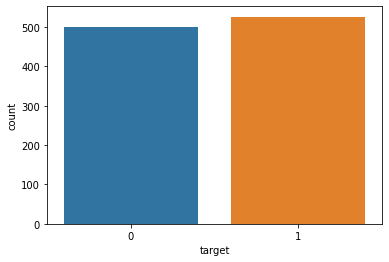

In [12]:
#fbs weakly correlated

y = dataset["target"]

sns.countplot(y)


1    526
0    499
Name: target, dtype: int64


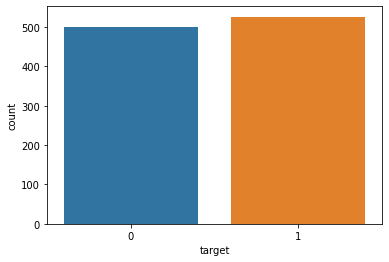

In [13]:
#analyzing target variable

y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [14]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))


Percentage of patience without heart problems: 164.69
Percentage of patience with heart problems: 173.6


In [15]:
#analysing "sex" feature

dataset["sex"].unique()

array([1, 0])

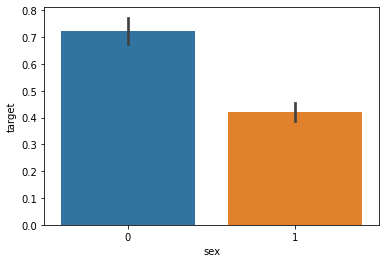

In [16]:
#2 unique features

#females are more likely to have heart problems than male

sns.barplot(dataset["sex"],y)

In [17]:
#analysing "chest pain type" feature

dataset["cp"].unique()


array([0, 1, 2, 3])

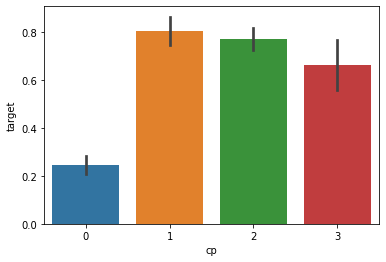

In [18]:
#has values from 0 to 3

# CP of "0" that is typical angina are much less likely to have heart problems

sns.barplot(dataset["cp"],y)

In [19]:
#analysing "FBS" feature

dataset["fbs"].describe()


count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

In [20]:
dataset["fbs"].unique()

array([0, 1])

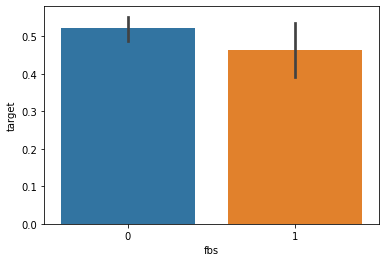

In [21]:
sns.barplot(dataset["fbs"],y)

In [22]:
#analysing "restecg" feature

dataset["restecg"].unique()

array([1, 0, 2])

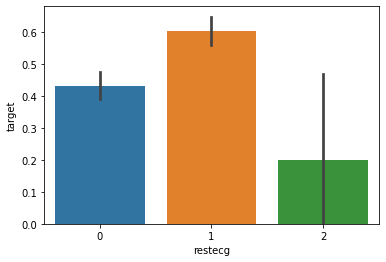

In [23]:
sns.barplot(dataset["restecg"],y)

#people with R 1 and 0 are much more likely to have heart desease than R 2

In [24]:
#analysing "exang" feature

dataset["exang"].unique()

array([0, 1])

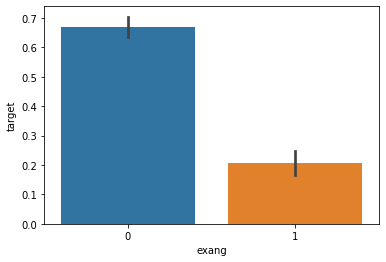

In [25]:
sns.barplot(dataset["exang"],y)

#people with E1, that is exercise induced angina are much less likely to have heart problems

In [26]:
#analysing "slope" feature

dataset["slope"].unique()



array([2, 0, 1])

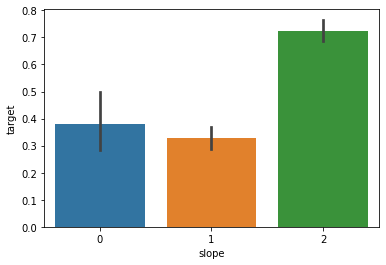

In [27]:
sns.barplot(dataset["slope"],y)

# S2 causes heartpain much more than S0 and S1

In [28]:
#analysing "slope" feature

dataset["ca"].unique()

array([2, 0, 1, 3, 4])

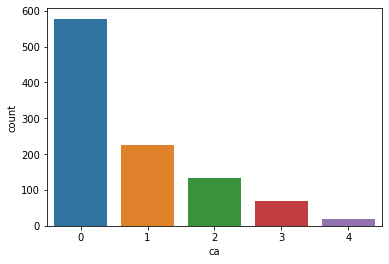

In [29]:
sns.countplot(dataset["ca"])


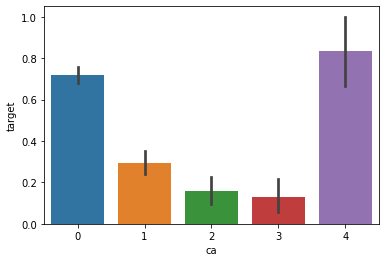

In [30]:
sns.barplot(dataset["ca"],y)

#CA4 has very high number of heart patients

In [31]:
#anlysing the 'thal' feature

dataset["thal"].unique()

array([3, 2, 1, 0])

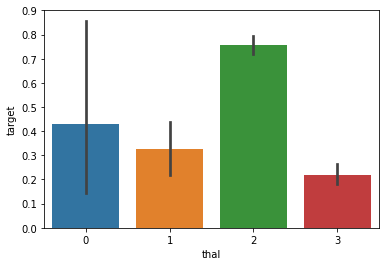

In [32]:
sns.barplot(dataset["thal"],y)

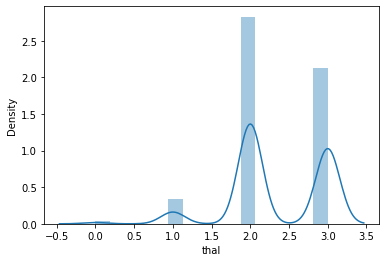

In [33]:
sns.distplot(dataset["thal"])

In [34]:
#TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.30,random_state=1)

In [35]:
X_train.shape

(717, 13)

In [36]:
X_test.shape

(308, 13)

In [37]:
Y_train.shape

(717,)

In [38]:
Y_test.shape

(308,)

In [39]:
## MODEL FITTING ##

from sklearn.metrics import accuracy_score

In [40]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [41]:
Y_pred_lr.shape

(308,)

In [42]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 82.47 %


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(Y_test,Y_pred_lr)

confusion_matrix

array([[118,  43],
       [ 11, 136]])

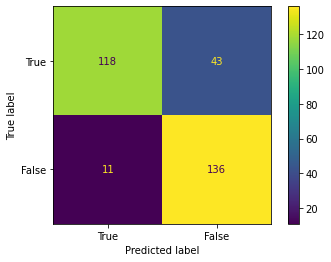

In [44]:
from sklearn import metrics
import numpy as np

actual = Y_test
predicted = Y_pred_lr

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])

cm_display.plot()
plt.show()

In [45]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81       161
           1       0.76      0.93      0.83       147

    accuracy                           0.82       308
   macro avg       0.84      0.83      0.82       308
weighted avg       0.84      0.82      0.82       308



In [46]:
#DECISION TREE

from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [47]:
print(Y_pred_dt.shape)

(308,)


In [48]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 99.03 %


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(Y_test,Y_pred_dt)

confusion_matrix

array([[161,   0],
       [  3, 144]])

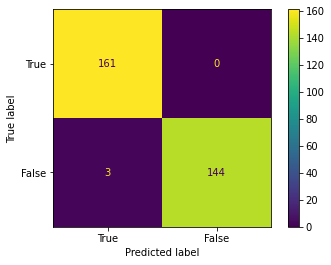

In [50]:
actual = Y_test
predicted = Y_pred_dt

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])

cm_display.plot()
plt.show()

In [51]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       161
           1       1.00      0.98      0.99       147

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



In [52]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [53]:
Y_pred_rf.shape

(308,)

In [54]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(Y_test,Y_pred_rf)

confusion_matrix

array([[161,   0],
       [  0, 147]])

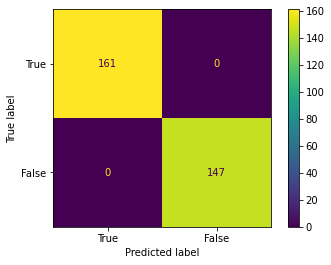

In [56]:
actual = Y_test
predicted = Y_pred_rf

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])

cm_display.plot()
plt.show()

In [57]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       147

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



In [58]:
#NEURAL NETWORK

from keras.models import Sequential
from keras.layers import Dense

In [59]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [60]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
23/23 [==============================] - 1s 3ms/step - loss: 6.5885 - accuracy: 0.5495
Epoch 2/300
23/23 [==============================] - 0s 2ms/step - loss: 2.9304 - accuracy: 0.6262
Epoch 3/300
23/23 [==============================] - 0s 3ms/step - loss: 2.2832 - accuracy: 0.6485
Epoch 4/300
23/23 [==============================] - 0s 2ms/step - loss: 1.8572 - accuracy: 0.6667
Epoch 5/300
23/23 [==============================] - 0s 2ms/step - loss: 1.6774 - accuracy: 0.6834
Epoch 6/300
23/23 [==============================] - 0s 2ms/step - loss: 1.5459 - accuracy: 0.6890
Epoch 7/300
23/23 [==============================] - 0s 2ms/step - loss: 1.4133 - accuracy: 0.7029
Epoch 8/300
23/23 [==============================] - 0s 2ms/step - loss: 1.2812 - accuracy: 0.7099
Epoch 9/300
23/23 [==============================] - 0s 2ms/step - loss: 1.1725 - accuracy: 0.7099
Epoch 10/300
23/23 [==============================] - 0s 2ms/step - loss: 1.0758 - accuracy: 0.7155
Epoch 11/

In [61]:
Y_pred_nn = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [62]:
Y_pred_nn.shape

(308, 1)

In [63]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [64]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.

The accuracy score achieved using Neural Network is: 81.17 %


In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(Y_test,Y_pred_nn)

confusion_matrix

array([[123,  38],
       [ 20, 127]])

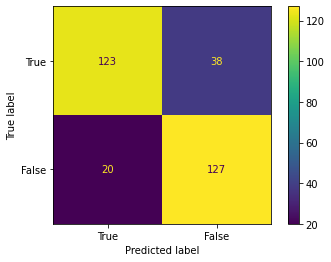

In [66]:
actual = Y_test
predicted = Y_pred_nn

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])

cm_display.plot()
plt.show()

In [67]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred_nn))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81       161
           1       0.77      0.86      0.81       147

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.81       308
weighted avg       0.82      0.81      0.81       308



In [68]:
scores = [score_lr, score_dt,score_rf, score_nn]
algorithms = ["Logistic Regression","Decision Tree","Random Forest","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 82.47 %
The accuracy score achieved using Decision Tree is: 99.03 %
The accuracy score achieved using Random Forest is: 100.0 %
The accuracy score achieved using Neural Network is: 81.17 %


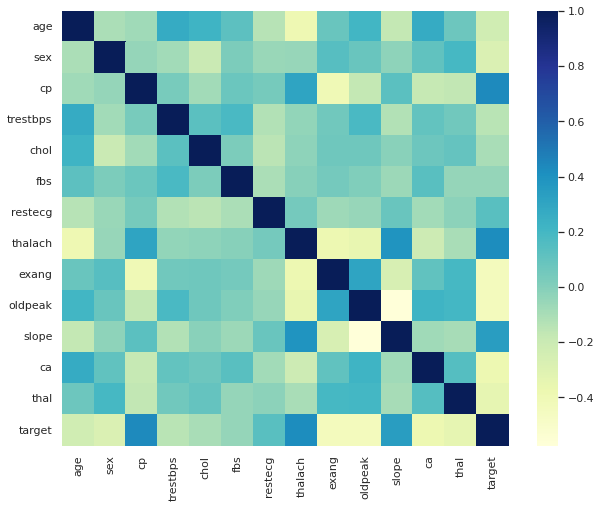

In [69]:
sns.set(rc={'figure.figsize':(10,8)})
dataset_corr = dataset.corr()
dataset_corr

import seaborn as sns

sns.heatmap(dataset_corr, cmap = 'YlGnBu')

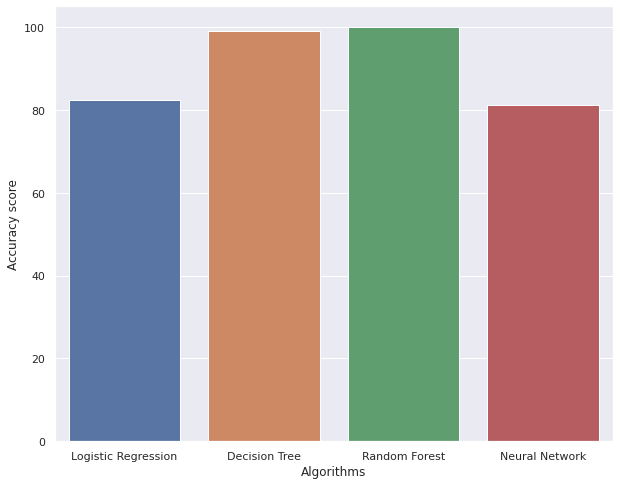

In [70]:
sns.set(rc={'figure.figsize':(10,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)